In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, RobustScaler # How to import Min Absolute Scaler 

In [2]:
pd.__version__

'2.0.0'

In [3]:
df = pd.read_csv('I:\Python Work sheets/train.csv',na_values=['N/A', 'NIL'])

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="O").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df['FamilySize'] = df['SibSp']+df['Parch']+1 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [14]:
df.isnull().sum()/len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
FamilySize      0.000000
dtype: float64

In [15]:
df.drop(columns = ["Cabin", "Name", "Ticket"],inplace = True,axis=1)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
first_condition = (df['Sex']=='female')
second_condition = (df['Age'].isnull())
    
female_age_nan_df = df[first_condition & second_condition]
female_age_nan_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
19,20,1,3,female,NaN,0,0,7.2250,C,1
28,29,1,3,female,NaN,0,0,7.8792,Q,1
31,32,1,1,female,NaN,1,0,146.5208,C,2
32,33,1,3,female,NaN,0,0,7.7500,Q,1
47,48,1,3,female,NaN,0,0,7.7500,Q,1
82,83,1,3,female,NaN,0,0,7.7875,Q,1
109,110,1,3,female,NaN,1,0,24.1500,Q,2
128,129,1,3,female,NaN,1,1,22.3583,C,3
140,141,0,3,female,NaN,0,2,15.2458,C,3
166,167,1,1,female,NaN,0,1,55.0000,S,2


In [18]:
def your_function(age,sex):
    if sex=='female' and np.isnan(age):
        return 27 # substituting the missing value based on condition
    elif sex=='male' and np.isnan(age):
        return 29 # substituting the missing value based on condition
    else:
        return age # return the default age or original age.
        
df['Age'] = df[['Age','Sex']].apply(lambda my_var: your_function(*my_var),axis=1)

In [19]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
FamilySize     0
dtype: int64

In [20]:
df['Embarked'].fillna('S', inplace=True)

In [21]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

In [22]:
df['Embarked'].isnull()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,27.0,1,2,23.4500,S,4
889,890,1,1,male,26.0,0,0,30.0000,C,1


In [23]:
Pseudo_df =pd.get_dummies(df, columns=['Sex', 'Embarked'])
Pseudo_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,2,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,1,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,2,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,1,True,False,False,False,True
888,889,0,3,27.0,1,2,23.4500,4,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,1,False,True,True,False,False


In [28]:
Pseudo_df.replace({False:0,True:1},inplace=True)
Pseudo_df.reset_index(drop=True,inplace=True)
Pseudo_df                      

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,2,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,889,0,3,27.0,1,2,23.4500,4,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [33]:
Pseudo_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [37]:
scaler = StandardScaler()
outlier_list =[ 'Age', 'Fare']
for out  in outlier_list :
    print( Pseudo_df[out].median())
    print( Pseudo_df.loc[df[out ] >65 , out])
    

29.0
33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
14.4542
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [ ]:
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])
Pseudo_df


In [ ]:
## Analysis of individual columns
## Numerical column  --> df.describe.columns
## or Categorical column  --> df.describe(include="O").columns



In [ ]:
num_columns = ['Age' ,'SibSp', 'Parch','FamilySize','Fare',]

categorical_cols = ['Sex', 'Embarked', 'Survived' , 'Pclass']

____________________ Age ____________________
mean of : 29.441268237934903
min of:  0.42
max of:  80.0
std of  Age :  13.018747116356973
variance  of  Age :  169.487776479653
skewness of  Age :  0.4918209954809144
Quantile of  Age :  16.0 22.0 29.0 35.0 47.0
Null Percentage of the  Age :  0.0


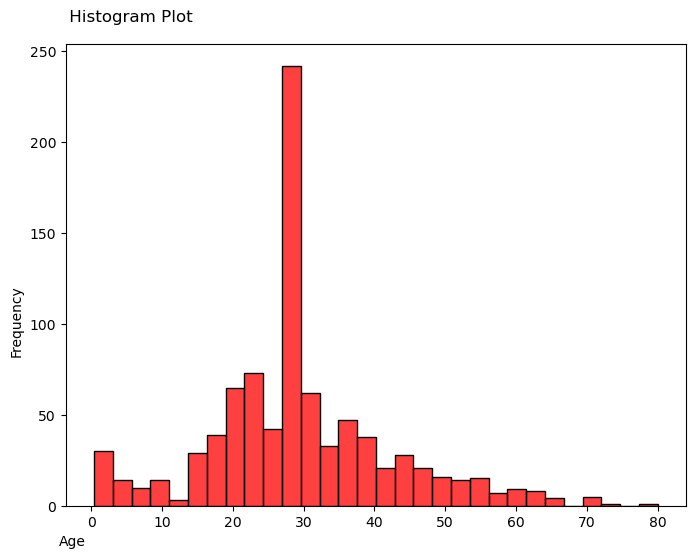

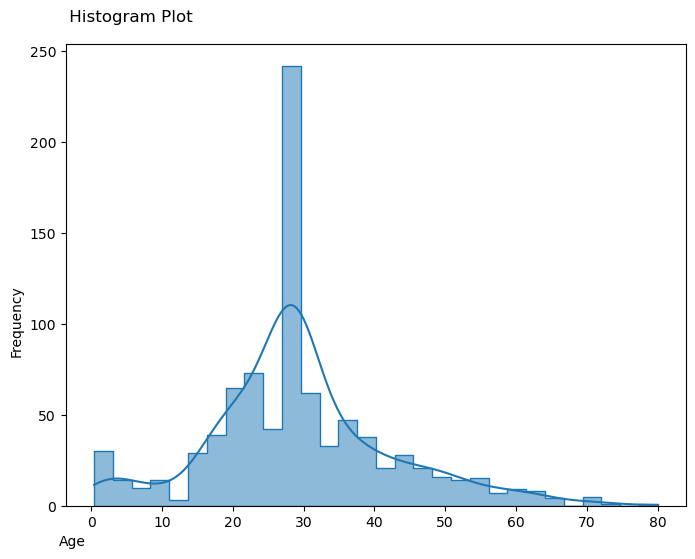

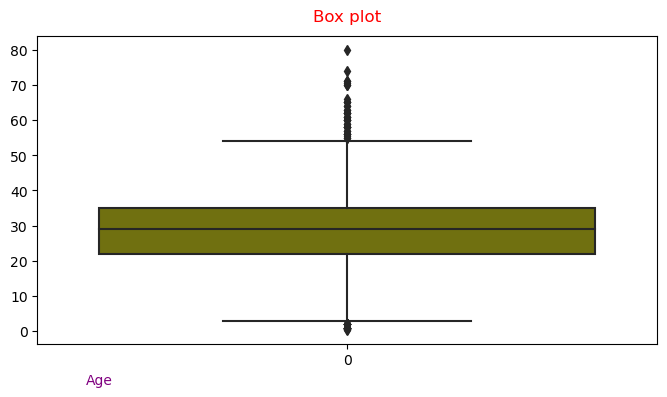

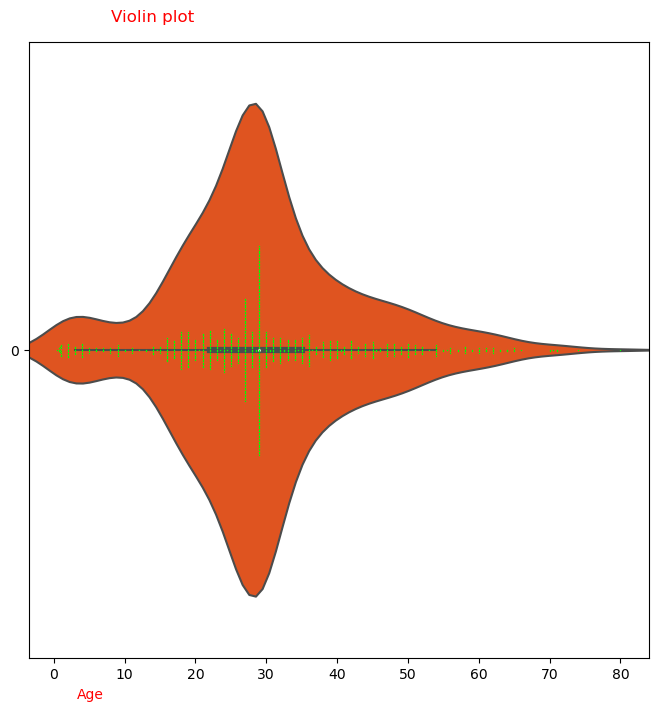

____________________ SibSp ____________________
mean of : 0.5230078563411896
min of:  0
max of:  8
std of  SibSp :  1.1027434322934275
variance  of  SibSp :  1.2160430774662894
skewness of  SibSp :  3.6953517271630565
Quantile of  SibSp :  0.0 0.0 0.0 1.0 1.0
Null Percentage of the  SibSp :  0.0


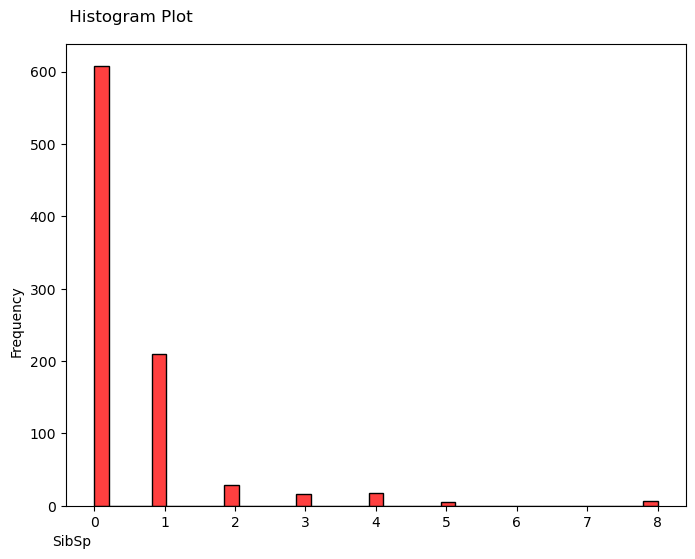

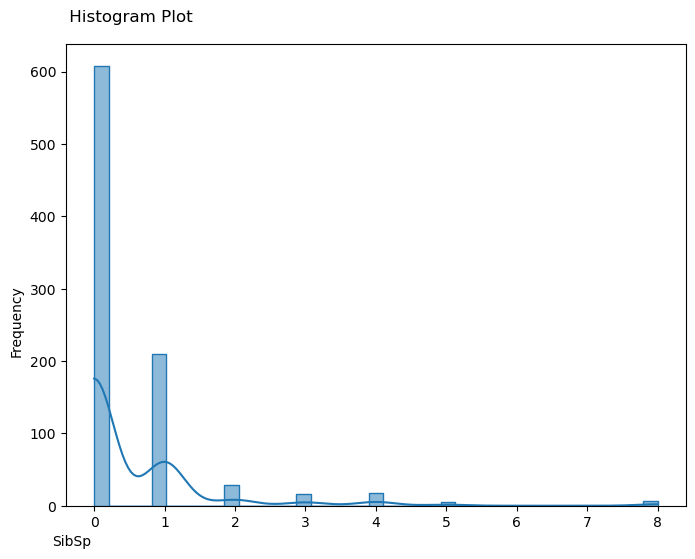

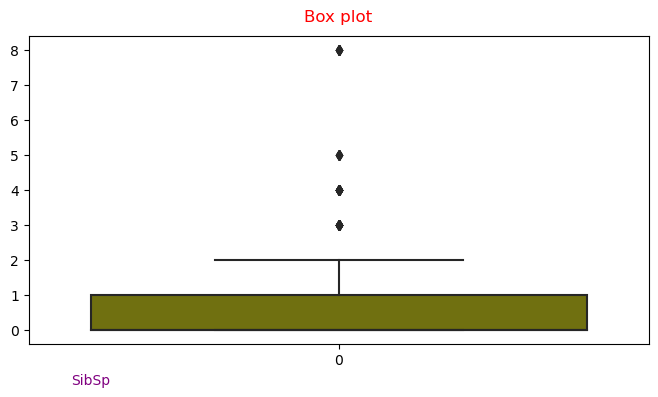

C:\Users\HP\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


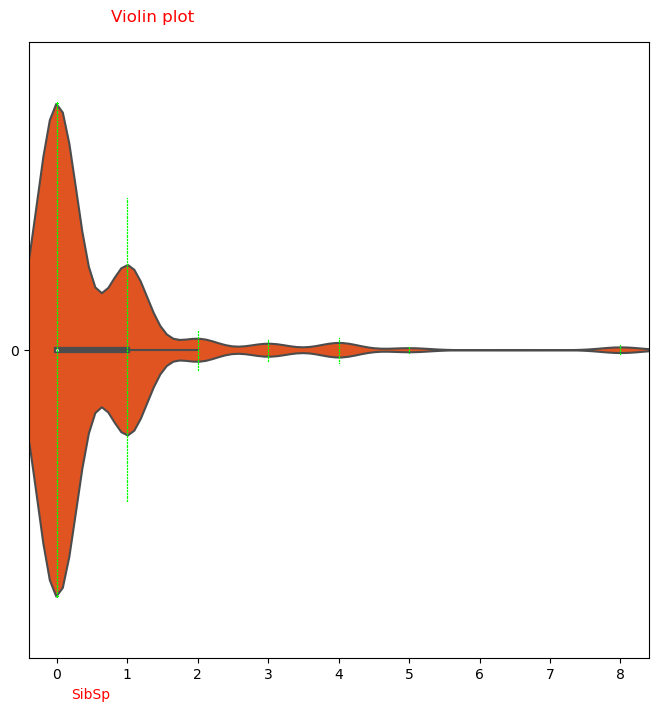

____________________ Parch ____________________
mean of : 0.38159371492704824
min of:  0
max of:  6
std of  Parch :  0.8060572211299559
variance  of  Parch :  0.6497282437357467
skewness of  Parch :  2.7491170471010933
Quantile of  Parch :  0.0 0.0 0.0 0.0 2.0
Null Percentage of the  Parch :  0.0


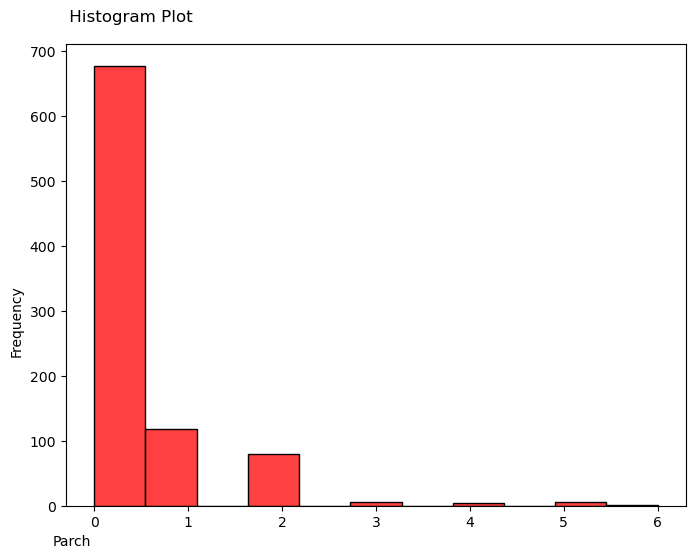

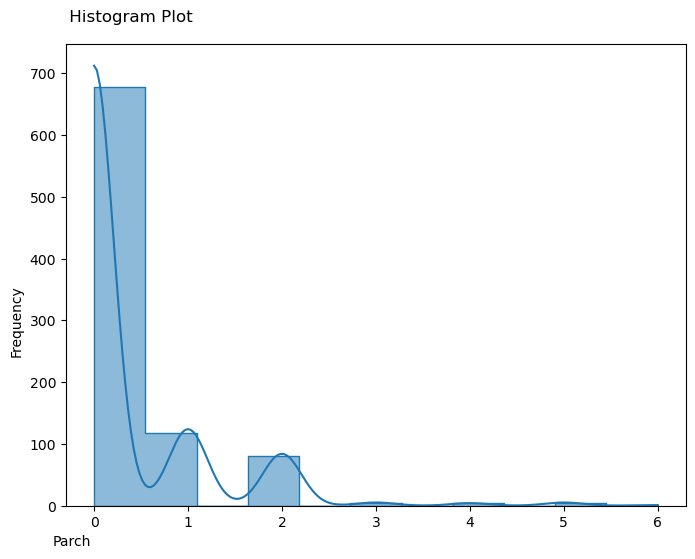

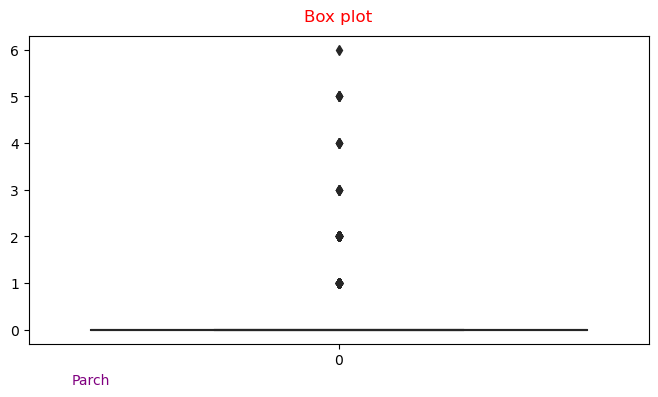

C:\Users\HP\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


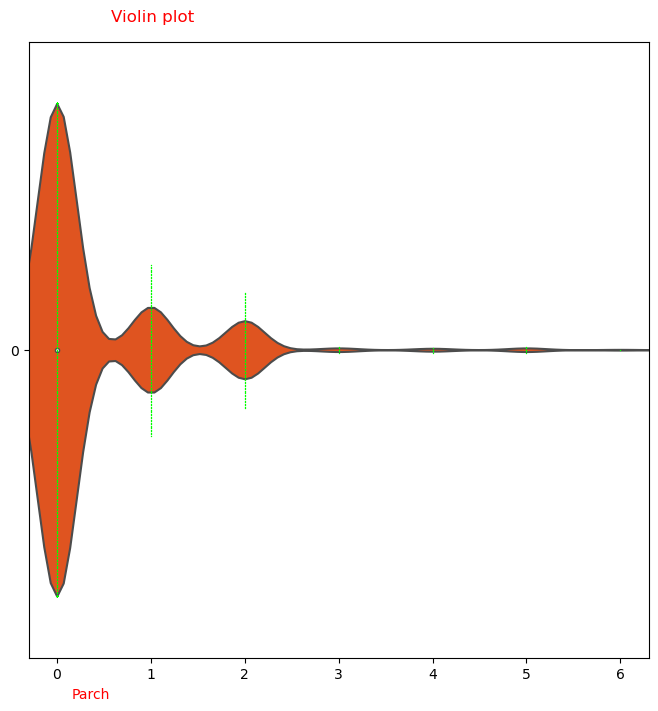

____________________ FamilySize ____________________
mean of : 1.904601571268238
min of:  1
max of:  11
std of  FamilySize :  1.6134585413550788
variance  of  FamilySize :  2.6032484646716587
skewness of  FamilySize :  2.7274414739308535
Quantile of  FamilySize :  1.0 1.0 1.0 2.0 4.0
Null Percentage of the  FamilySize :  0.0


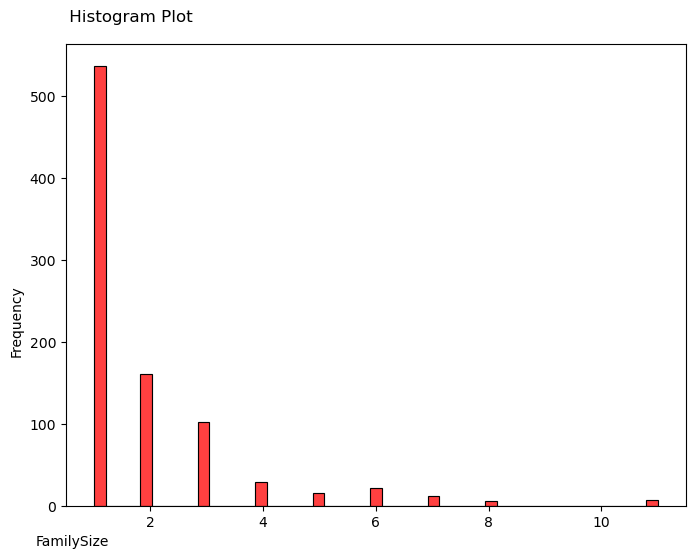

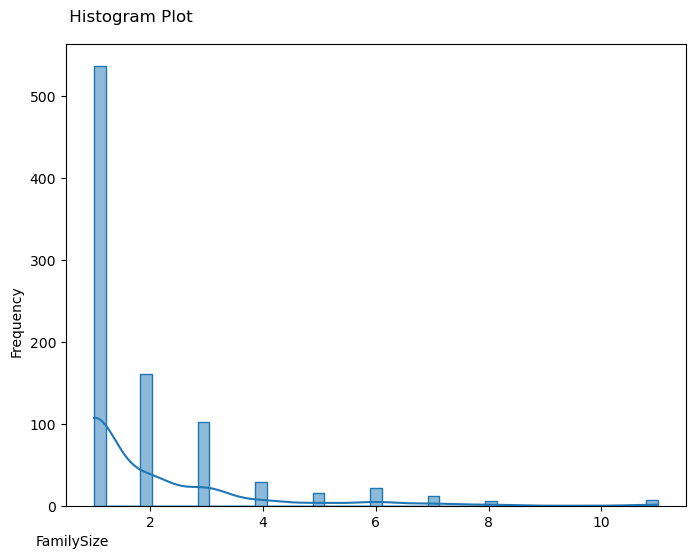

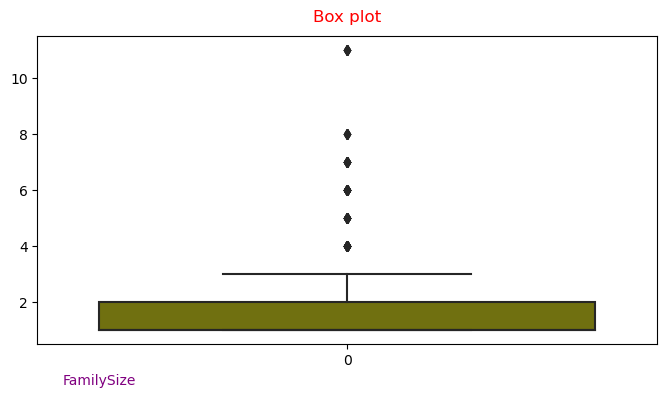

C:\Users\HP\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


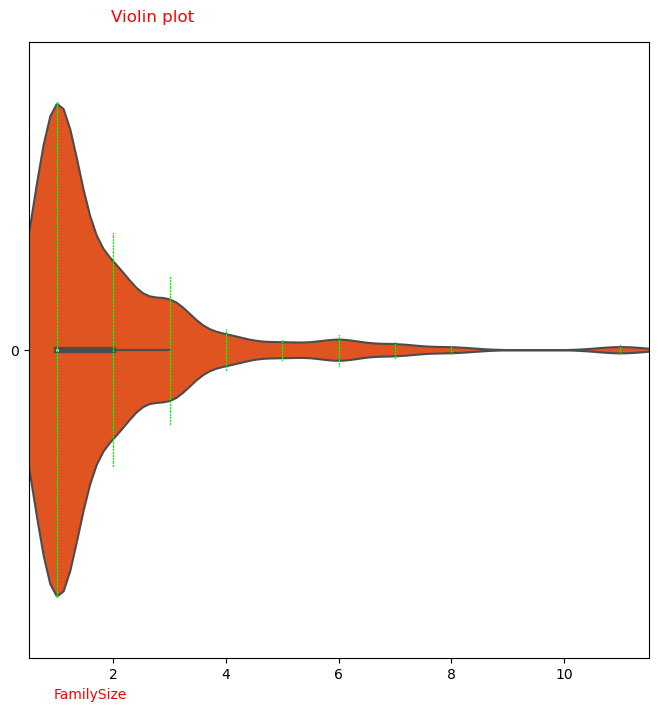

____________________ Fare ____________________
mean of : 32.204207968574636
min of:  0.0
max of:  512.3292
std of  Fare :  49.693428597180905
variance  of  Fare :  2469.436845743117
skewness of  Fare :  4.787316519674893
Quantile of  Fare :  7.55 7.9104 14.4542 31.0 77.9583
Null Percentage of the  Fare :  0.0


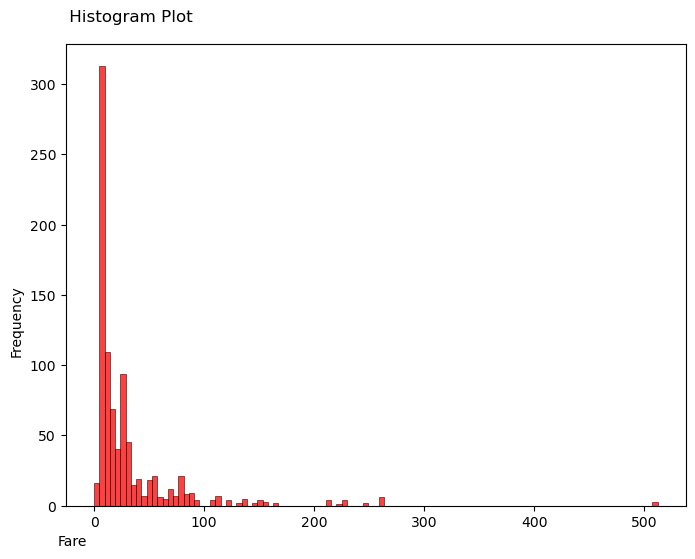

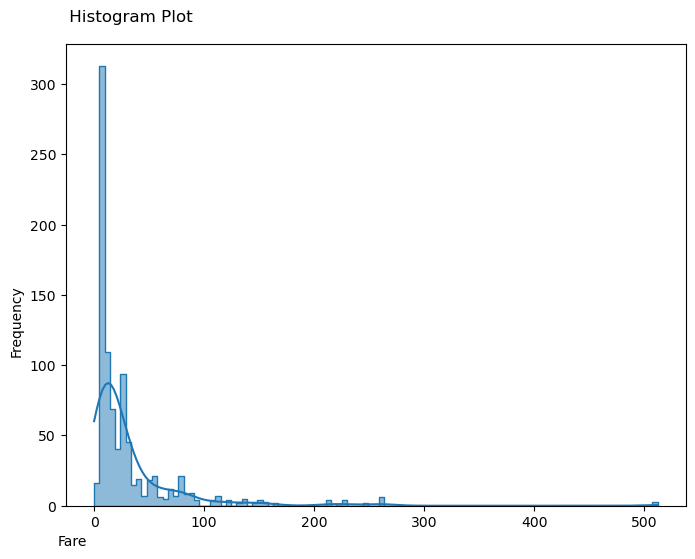

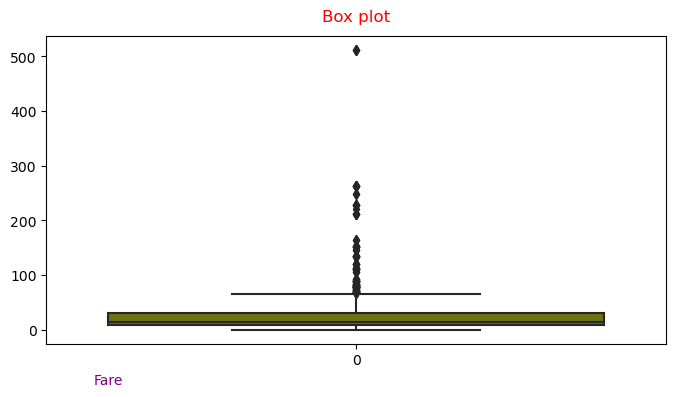

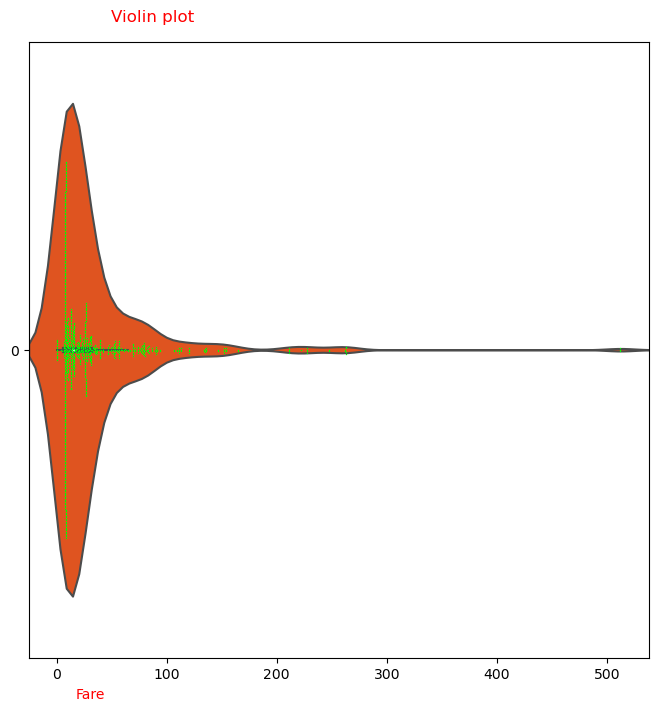

In [43]:
for col in num_columns :
    print ("_"*20,col,"_"*20)
    print("mean of :", Pseudo_df[col].mean())
    print("min of: ",Pseudo_df[col].min())
    print("max of: ",Pseudo_df[col].max())
    print("std of ",col,": ",Pseudo_df[col].std())
    print("variance  of ",col,": ",Pseudo_df[col].var())
    print("skewness of ",col,": ",Pseudo_df[col].skew())
    print ("Quantile of ",col,": ",Pseudo_df[col].quantile(0.10),Pseudo_df[col].quantile(0.25),Pseudo_df[col].quantile(0.50),Pseudo_df[col].quantile(0.75),Pseudo_df[col].quantile(0.90))
    print ("Null Percentage of the ",col,": ",Pseudo_df[col].isnull().sum()/len(col) * 100)

    plt.figure(figsize=(8,6))
    sns.histplot(Pseudo_df[col],color="red")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()


    plt.figure(figsize=(8,6))
    sns.histplot(Pseudo_df[col],kde=True,element="step")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(col,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()

    plt.figure(figsize=(8,4))
    # Box plot
    sns.boxplot(Pseudo_df[col],orient="V",color= "olive") 
    plt.title("Box plot",y=1.02, color= "red" )
    plt.xlabel(col, x=0.1,color= "purple" )
    # plt.ylabel("")
    plt.show()


    plt.figure(figsize=(8,8))
    # Violin Plot
    sns.violinplot(Pseudo_df[col],orient="h",color="orangered")
    sns.swarmplot( Pseudo_df[col],size=1,orient="h",color="lime")

    plt.title("Violin plot",x=0.2,y=1.02,color="Red" )
    plt.xlabel(col,size=10,x=0.1,color="Red")
    # plt.ylabel("")
    plt.show()




Age Column has a symmetrical distribution with skew 0.32 which is between -0.5 and 0.5 .

Density curve for Age is centred around mean 29.69 with standard deviation of 14.52.
Range of Age value is from minimum 0.40 yrs and maximum 80 yrs.
Most of the people are failling under age group of 20-40 yrs.
10% of people are of age 14 and below.
25% of people are of age 20 and below.
50% of people are of age 28 and below.
75% of people are of age 38 and below.
90% of people are of age 50 and below.
Age column has few extreme values toward higher age group 65 yrs and above.
Age column could be a good predictor for Survival and it's relation with other columns should be explored further.

Fare Column has a symmetrical distribution with skew 4.78 which is greater then 1 the data is extremly skewed 

Density curve for Fare is centred around mean 32.20 with standard deviation of 49.70 
Range of Fare value is from minimum 0.00 and maximum 512 .
Most of the Fare are failling under 0 - 50 .
10% of Fare are of 7.55 and below.
25% of Fare are of 7.91 and below.
50% of Fare are of 14.45 and below.
75% of Fare are of 31 and below.
90% of Fare are of 78 and below.
Fare column has many  extreme values toward higher Fare group 78 and above.
Fare column could be a good predictor for Survival and it's relation with other columns will
be explored further.

Family  Column has a extremly skewed values  with skew 2.72 which is greater then 1 .

Density curve for Family size  is centred around mean 1.90 with standard deviation of 1.61.
Range of Family size  value is from minimum 1 pax  and maximum 11 pax 
Most of the Family size  are failling under  group of 1pax to 3pax .
10% of family size are of 1 pax 
25% of Family size are of  1  pax and below.
50% of Family size of  1 pax and below.
75% of Family size of  2 pax and below.
90% of Family size are of 4 pax  and below.
Family size column has many  extreme values toward higher family size  group 3 pax  and above.
Family size column could be a good predictor for Survival and it's relation with other columns should be explored further.

In [55]:
categorical_cols = ['Survived' , 'Pclass'] # other categorial column is not  working 

__________________________________________________ Survived __________________________________________________
unique  of:  [0 1]
count of :  Survived
0    549
1    342
Name: count, dtype: int64
0.0


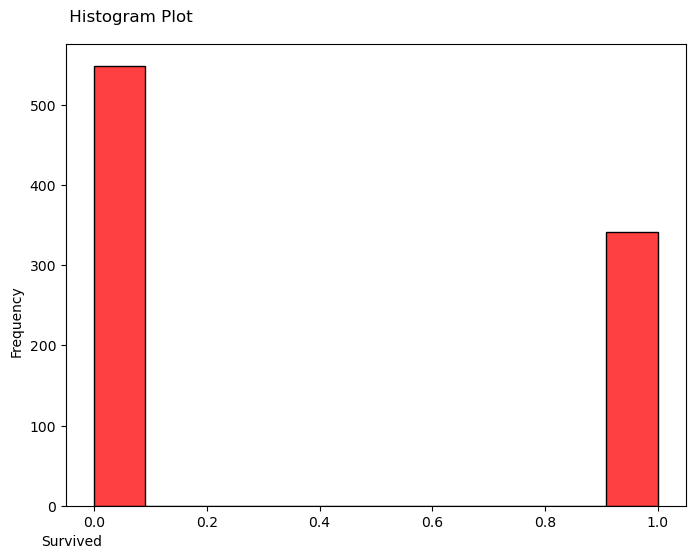

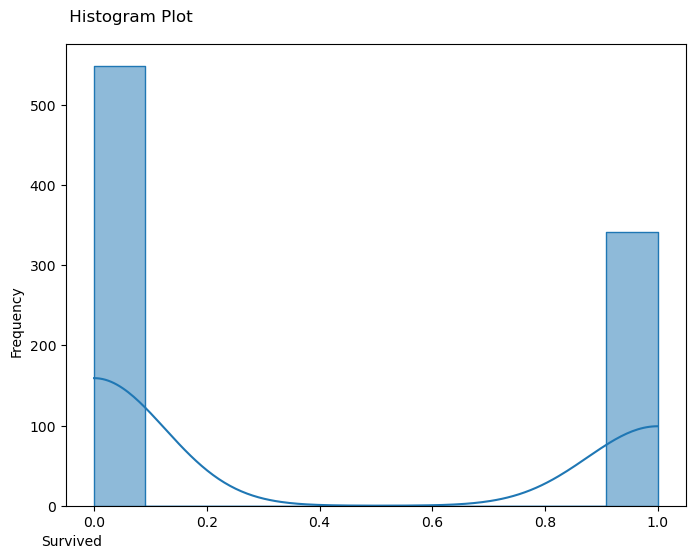

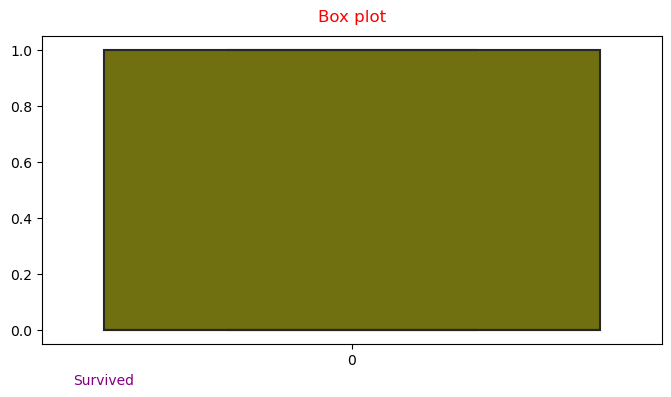

C:\Users\HP\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


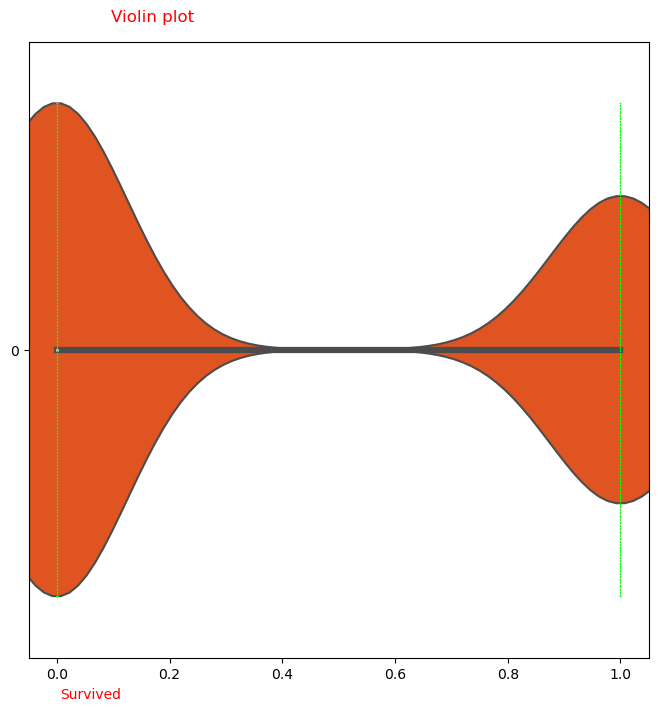

__________________________________________________ Pclass __________________________________________________
unique  of:  [3 1 2]
count of :  Pclass
3    491
1    216
2    184
Name: count, dtype: int64
0.0


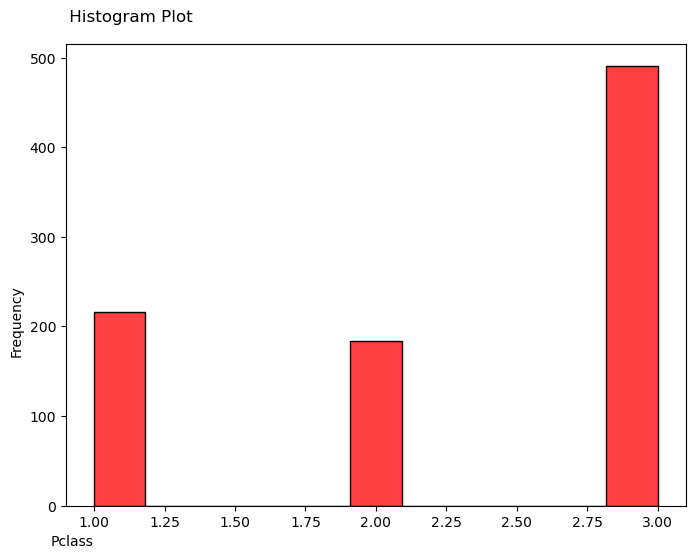

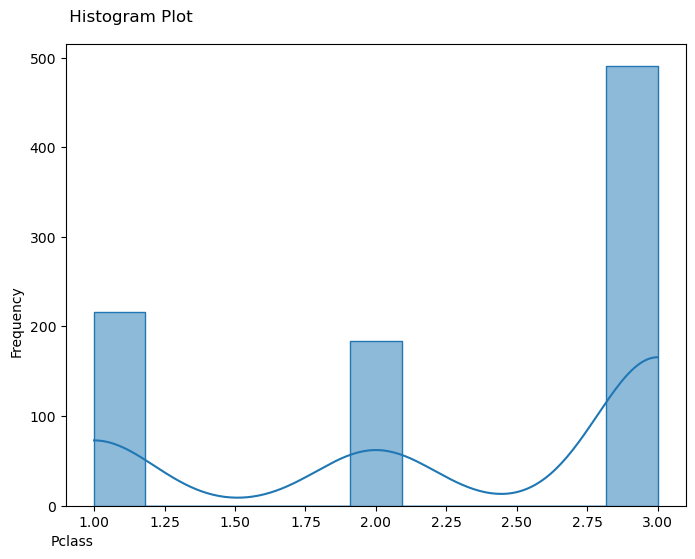

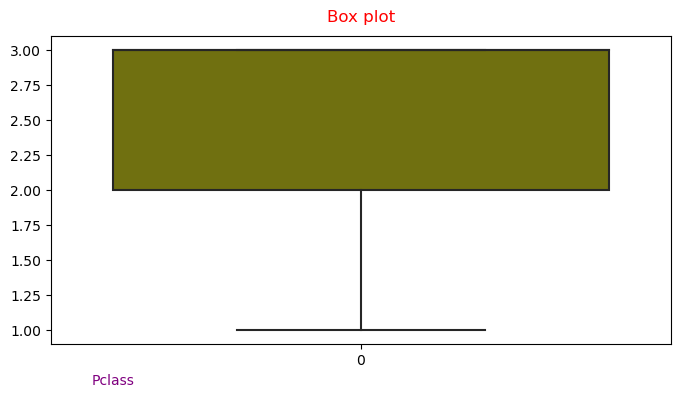

C:\Users\HP\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


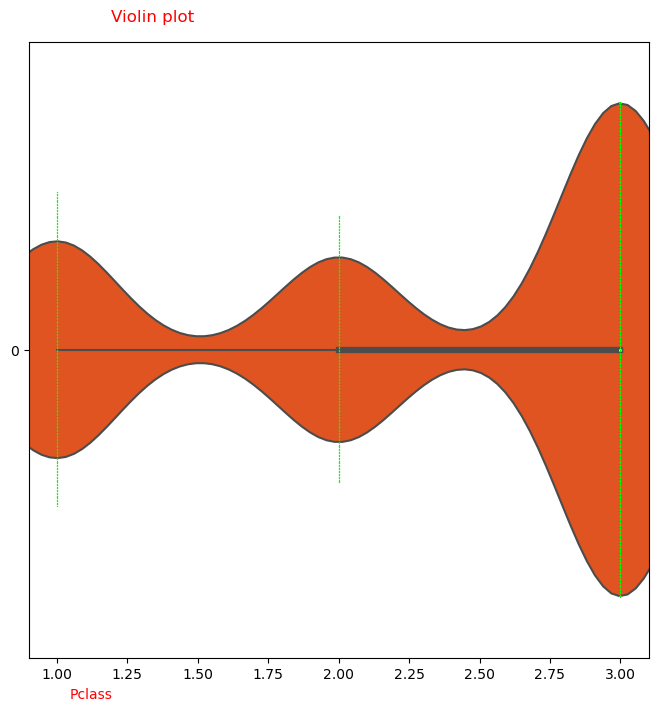

In [60]:
for cat in categorical_cols:
    print ("_"*50,cat,"_"*50)
    print("unique  of: ",Pseudo_df[cat].unique())
    print("count of : ",Pseudo_df[cat].value_counts())
    print (Pseudo_df[cat].isnull().sum()/len(Pseudo_df[cat]) * 100)
    
    plt.figure(figsize=(8,6))
    sns.histplot(Pseudo_df[cat],color="red")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(cat,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()


    plt.figure(figsize=(8,6))
    sns.histplot(Pseudo_df[cat],kde=True,element="step")
    plt.title(" Histogram Plot",x=0.1 ,y=1.03)
    plt.xlabel(cat,x=.01,y=1.02)
    plt.ylabel("Frequency",y=.4) 
    plt.show()

    plt.figure(figsize=(8,4))
    # Box plot
    sns.boxplot(Pseudo_df[cat],orient="V",color= "olive") 
    plt.title("Box plot",y=1.02, color= "red" )
    plt.xlabel(cat, x=0.1,color= "purple" )
    # plt.ylabel("")
    plt.show()


    plt.figure(figsize=(8,8))
    # Violin Plot
    sns.violinplot(Pseudo_df[cat],orient="h",color="orangered")
    sns.swarmplot( Pseudo_df[cat],size=1,orient="h",color="lime")

    plt.title("Violin plot",x=0.2,y=1.02,color="Red" )
    plt.xlabel(cat,size=10,x=0.1,color="Red")
    # plt.ylabel("")
    plt.show()

    

In [ ]:
## Multi-column Analysis or (Bi-variate Analysis)

In [ ]:
for col in num_columns :
    for cat in categorical_cols :
        print ("_"*20,cat,"_"*20)
        print(Pseudo_df.groupby([cat])[col].head())
        print(Pseudo_df.groupby([cat])[col].tail())
        print(Pseudo_df.groupby([cat])[col].describe())
        print(Pseudo_df.groupby([cat])[col].describe(include="O"))
        print(Pseudo_df.groupby([cat])[col].mean())
        print(Pseudo_df.groupby([cat])[col].median())
        print(Pseudo_df.groupby([cat])[col].std())
        
        plt.figure(figsize=(8,6))
        sns.barplot(data=Pseudo_df,x=cat,y=col,hue=cat,errorbar=None)
        plt.title("Bar plot",y=1.02)
        plt.xlabel(cat)
        plt.ylabel(col)
        plt.show()
        
        plt.figure(figsize=(8,6))
        sns.histplot(data=Pseudo_df,x=cat,y=col,bins=100,kde=True,element="step")
        plt.title(" Histogram Plot",x=0.1 ,y=1.03)
        plt.xlabel(col,x=.01,y=1.02)
        plt.ylabel(cat,y=.4) 
        plt.show()

        plt.figure(figsize=(8,6))
        sns.displot(data=Pseudo_df, x=col, hue=cat,multiple="stack",)
        plt.title(" Distribution Plot",x=0.1 ,y=1.03)
        plt.xlabel(col,x=.01,y=1.02)
        plt.ylabel(cat,y=.4) 
        plt.show()
        
        plt.figure(figsize=(8,4))
        sns.scatterplot(x=cat, y=col, hue=cat , data=Pseudo_df)
        plt.show()
        
        


        plt.figure(figsize=(8,8))
        # Violin Plot
        sns.violinplot(data=Pseudo_df,x=col,y=cat,orient="h",color="orangered")
        sns.swarmplot( data=Pseudo_df,x=col,y=cat,size=1,orient="h",color="lime")

        plt.title("Violin plot",x=0.2,y=1.02,color="Red" )
        plt.xlabel(cat,size=10,x=0.1,color="Red")
        plt.ylabel(col)
        plt.show()
       
         #3D Plot 
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111, projection='3d')
        ax.displot(Pseudo_df[cat],Pseudo_df[col],Pseudo_df[cat])
        ax.set_xlabel(cat)
        ax.set_ylabel(col)
        ax.set_zlabel(cat )
        plt.show()
         
        plt.figure(figsize=(8,4))
        # Box plot
        sns.boxplot(data=Pseudo_df,x=col,hue=cat,orient="H",color= "olive") 
        plt.title("Box plot",y=1.02, color= "red" )
        plt.xlabel(cat, x=0.1,color= "purple" )
        plt.ylabel(col)
        plt.show()
         

In [ ]:
plt.figure(figsize=(4,6))
# piechart
sizes = [577,314]
plt.pie(sizes, labels=["male","female"], autopct='%1.2f%%')
plt.legend() # what color is mapped to what values.
plt.show()

In [ ]:
df['Sex'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,6))
# Countplot
sns.countplot(x=df["Sex"])

plt.title("Count plot for Sex",y=1.02)
plt.xlabel("Sex")
# plt.ylabel("")
plt.show()
plt.show()

**Sex**  column is having 2 uniques values and they are male and female.

no. of male are 577 and it is 64.75% of data.

no. of female are 314 and it is 35.24%

Sex column could have some impact of survival, so it would be logical to explore this further with other columns together.

**Name column**

In [ ]:
df['Name'].value_counts().sort_values()

In [ ]:
!pip install wordcloud
!pip install freetype-py
!pip install --upgrade --user pillow
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(10,10)) 
# Word cloud
text = " ".join(df['Name'].to_list())
wordcloud = WordCloud().generate_from_text(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Name column has unique values and doesn't provide with any usefull analytical 

***Ticket Column*** 

In [ ]:
df['Ticket'].value_counts().sort_values(ascending=False)

Ticket column has few repeated values 

This is might indication of the family is travelling on the same ticket 

One possible investigation could be for these repeated value what is the relative family size

However it doesn't provide with any useful analytical information. As such, we can remove the name column from further analysis.

**CABIN COLUMN**

In [ ]:
df['Cabin'].value_counts().sort_values(ascending=False)

In [ ]:
df["Cabin"].isnull().sum()

Cabin column has few repeated values and nearly 77% empty values.

Repeated value might have an indication that more than one person is travelling in same Cabin.

This could possibly indicate that Cabin might be shared for entire family rather than individual member.

One possible investigation could be for these repeated value what is the relative family size.

However it doesn't provide with any useful analytical information.
As such, we can remove the name column from further analysis.

***Embarked Column***

In [ ]:
df['Embarked'].value_counts().sort_values(ascending=False)

In [ ]:
df['Embarked'].value_counts(normalize=True).sort_values(ascending=False)*100

In [ ]:
df['Embarked'].isnull().sum()

In [ ]:
plt.figure(figsize=(8,6))

plt.pie([644,168,77],labels=["S","C","Q"], autopct='%1.1f%%')
plt.title("Pie-chart showing % distibution from different Embarked point")
plt.legend()
plt.show()

***Embarked*** Columns has two nan value which can be fixed later.

Nearly 72% of the travellers are boarding from this port S.
About 18% of the travellers are boarding from this port C.
And around 8% of the travellers are boarding at port Q.
It would intresting to discovers it's relation with other columns like Fare, Age, Pclass, Survived column.

In [ ]:
## Psudeo Numerical columns
#  Treat them in the same way you treat a categorical column

# 'PassengerId' is a column which indicate all individual passenger on the titanic ship.
# "Survived" column it tells you whether the the people {survived :1 or died :0} .
# "Pclass" indicated the class in which people where travelling {"First class":1, "Second class":2, "Third class": 3


**PASSENGER ID**

In [ ]:
df['Survived'].value_counts().sort_values(ascending=False)

In [ ]:
df['Survived'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,6))
# Countplot
sns.countplot(x=df["Survived"])

plt.title("Count plot for Survived",y=1.02)
plt.xlabel("Survived")
# plt.ylabel("")
plt.show()
plt.show()

Survived column indicates which passenger survived or died in titanic crash.

0 indicate that passenger has died in the crash wihich is around 68%.

1 indicate that passenger survived the crash which is nearly 31%

This column is of importance because this is what we will try to predict using Machine learning model later.

Investigation of relation with other columns is a must to understand what factor can crucial to predict this.

***Pclass column***

In [ ]:
df['Pclass'].value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(8,6))
# Countplot
sns.countplot(x=df["Pclass"])

plt.title("Count plot for Survived",y=1.02)
plt.xlabel("Sex")
# plt.ylabel("")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))

plt.pie([216,184,491],labels=["1","2","3"], autopct='%1.1f%%')
plt.title("Percentage of people survived in Different Class ",x=0.2,y=1.02,color="olive")
plt.legend()
plt.show()

Pclass column indicates the class in which passenger was Travelling.

3 indicate that passenger travelling in 3rd class which is around 55%.

2 indicate that passenger travelling in 2nd class which is around 20%.

1 indicate that passenger travelling in 2nd class which is around 24%.

Further investigation with other columns is a required to understand what is the relation between them.

In [ ]:
df.drop_duplicates().reset_index(drop=True)